In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # Set CUDA_VISIBLE_DEVICES to an empty string

import tensorflow as tf

C:\Users\INBOTICS\.conda\envs\project\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\INBOTICS\.conda\envs\project\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\INBOTICS\.conda\envs\project\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os,cv2
from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential ,Model, load_model
from tensorflow.keras.layers import Dropout, Flatten, Dense ,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tqdm.notebook import tqdm_notebook
import time

In [3]:
# directory="Dataset/"

directory="bone_marrow_cell_dataset/"
classses=os.listdir(directory)
accuracy_list = []

In [4]:
classses

['ART',
 'BLA',
 'EBO',
 'EOS',
 'LYT',
 'MMZ',
 'MON',
 'MYB',
 'NGB',
 'NGS',
 'NIF',
 'PEB',
 'PLM',
 'PMO']

In [5]:
import os
import cv2
image_size=224
data1=[]#empty list
for category in classses:
    path = os.path.join(directory, category)
    print(path)
    label = classses.index(category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        arr = cv2.imread(img_path)#Reading Images
        arr = cv2.cvtColor(arr, cv2.COLOR_BGR2RGB)
        new_arr = cv2.resize(arr, (image_size, image_size))#Resizing into same shape
        data1.append([new_arr, label])

bone_marrow_cell_dataset/ART
bone_marrow_cell_dataset/BLA
bone_marrow_cell_dataset/EBO
bone_marrow_cell_dataset/EOS
bone_marrow_cell_dataset/LYT
bone_marrow_cell_dataset/MMZ
bone_marrow_cell_dataset/MON
bone_marrow_cell_dataset/MYB
bone_marrow_cell_dataset/NGB
bone_marrow_cell_dataset/NGS
bone_marrow_cell_dataset/NIF
bone_marrow_cell_dataset/PEB
bone_marrow_cell_dataset/PLM
bone_marrow_cell_dataset/PMO


In [6]:
import random
random.shuffle(data1)

In [7]:
classses

['ART',
 'BLA',
 'EBO',
 'EOS',
 'LYT',
 'MMZ',
 'MON',
 'MYB',
 'NGB',
 'NGS',
 'NIF',
 'PEB',
 'PLM',
 'PMO']

In [8]:
x=[]#ndependent
y=[]#dependent
for features,labels in data1:
    x.append(features)
    y.append(labels)

In [9]:
x=np.array(x)
y=np.array(y)
#x=x/255 #feature scaling

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# EfficientNetB7

In [11]:
from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


base_model = applications.EfficientNetB7(weights='imagenet', include_top=False, input_shape=(224,224,3))

model_eff = Sequential()
#data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model_eff.add(base_model)
model_eff.add(Flatten(input_shape=base_model.output_shape[1:]))
model_eff.add(Dense(512, activation='relu'))
model_eff.add(Dense(256, activation='relu'))
model_eff.add(Dense(128, activation='relu'))
model_eff.add(Dense(64, activation='relu'))
model_eff.add(Dense(len(classses), activation='softmax'))

model_eff = Model(inputs=model_eff.input, outputs=model_eff.output)
model_eff.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])


In [12]:
EfficientNet_progess_1 = model_eff.fit(x=X_train,y=y_train,epochs=5,validation_data= (X_test, y_test),batch_size=16)

Epoch 1/5
350/350 [==============================] - 5528s 16s/step - loss: 1.7463 - accuracy: 0.4391 - val_loss: 1.1562 - val_accuracy: 0.6271
Epoch 2/5
350/350 [==============================] - 5507s 16s/step - loss: 0.7185 - accuracy: 0.7632 - val_loss: 1.1838 - val_accuracy: 0.6479
Epoch 3/5
350/350 [==============================] - 5487s 16s/step - loss: 0.3112 - accuracy: 0.8957 - val_loss: 1.3076 - val_accuracy: 0.6664
Epoch 4/5
350/350 [==============================] - 5475s 16s/step - loss: 0.1772 - accuracy: 0.9416 - val_loss: 1.2896 - val_accuracy: 0.6714
Epoch 5/5
350/350 [==============================] - 5477s 16s/step - loss: 0.1365 - accuracy: 0.9548 - val_loss: 1.5164 - val_accuracy: 0.6479


In [13]:
model_eff.save("model/EfficientNetB7.hp5")


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model/EfficientNetB7.hp5\assets


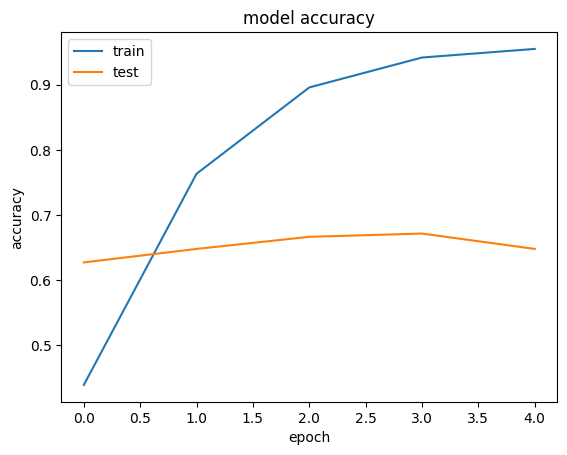

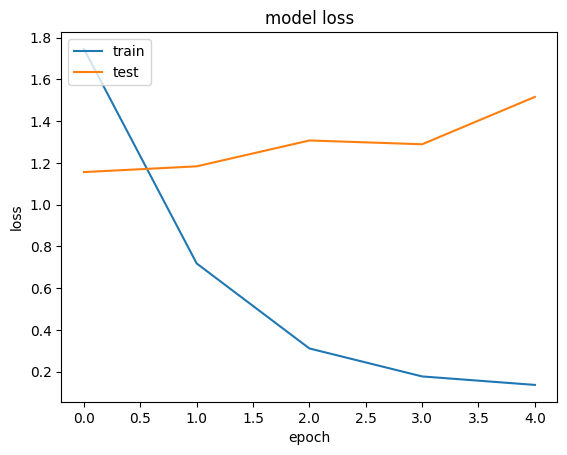

In [14]:
plt.plot(EfficientNet_progess_1.history['accuracy'])
plt.plot(EfficientNet_progess_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(EfficientNet_progess_1.history['loss'])
plt.plot(EfficientNet_progess_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
Y_pred = model_eff.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

[[74  0  0  0  4  1  1  2  1  0  9  0  1  2]
 [ 6 44  0  2 12  0 13  3  0  0 12  3  0  7]
 [ 0  1 77  0  3  0  1  0  1  0 12  0  9  0]
 [ 3  0  0 76  1  2  0  0  0  0  1  0  0  1]
 [ 6  3  2  0 64  2  0  2  0  0 22  0  2  0]
 [ 1  0  0  1  0 40  3 14 21  3  2  0  0  5]
 [ 1  3  2  3  0  6 51  7  7  1  9  0  1  4]
 [ 1  0  2  1  0 21  2 54  2  0  1  0  1 17]
 [ 1  0  0  1  0 24  0  2 48 17  5  0  1  0]
 [ 1  1  0  3  0  3  1  0 19 82  2  0  0  0]
 [10  3  1  2  4  4  1  0  1  3 60  0  0  0]
 [ 1  8  5  0  1  0  2  0  0  0  2 88  0  7]
 [ 2  2  1  0  2  0  0  2  0  0  5  1 92  0]
 [ 0  5  0  0  0 10  2 24  0  0  2  1  3 57]]


<AxesSubplot:>

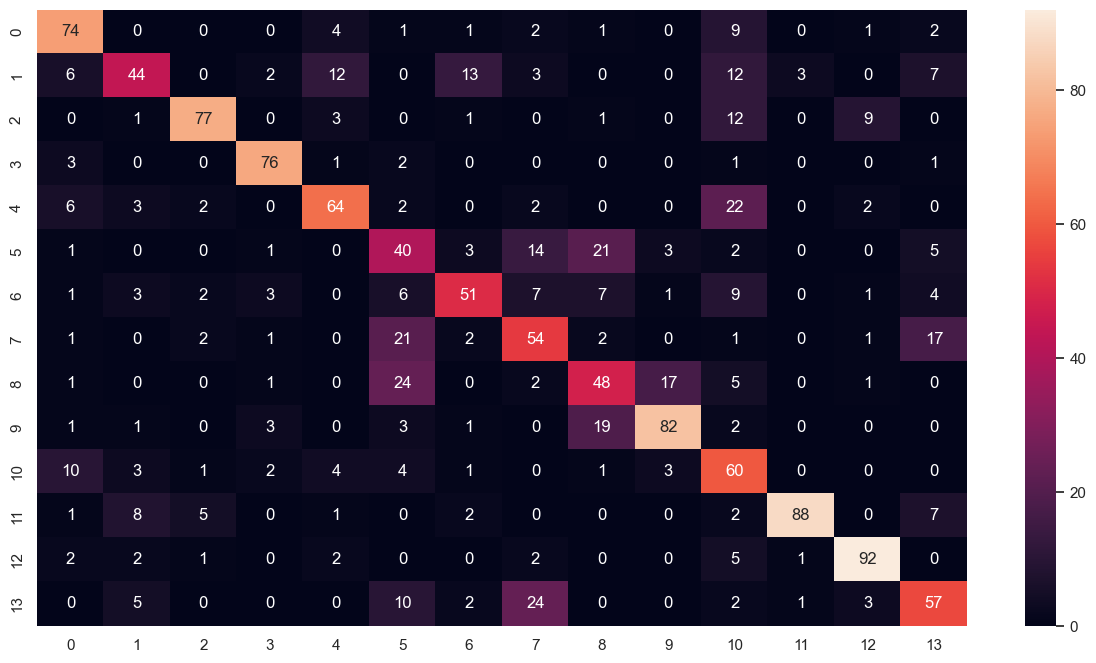

In [16]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(cf_matrix, annot=True)

In [ ]:
import os
for i in os.listdir("testing/"):
    print(i)
    
    from tensorflow import keras
    model = keras.models.load_model('model/EfficientNetB7.hp5')
    from keras.preprocessing import image
    image_size=224
    #img = cv2.imread(path1+"//"+i)
    path="testing/"+i
    img = image.load_img(path, target_size=(image_size, image_size))
    x = image.img_to_array(img)
    print(type(x))
    img_4d=x.reshape(1,224,224,3)
    #img_4d=img_4d/255
    model = keras.models.load_model('model/EfficientNetB7.hp5')
    predictions = model.predict(img_4d)
    print(predictions[0])
    new_pred=np.argmax(predictions[0])
    print(new_pred)
#     ['COVID19', 'NORMAL', 'OTHERS', 'PNEUMONIA', 'TUBERCOLOSIS']
    dict1={0:'ART',1:'BLA',2:'EBO',3:'EOS',4:'LYT',5:'MMZ',6:'MON',7:'MYB',8:'NGB',9:'NGS',10:'NIF',11:'PEB',12:'PLM',13:'PMO'}
    list1=['ART','BLA','EBO','EOS','LYT','MMZ','MON','MYB','NGB','NGS','NIF','PEB','PLM','PMO']
    a=dict1[new_pred]
    
    print(str(a)+" Detected in Image")
    print("-----------------------------------------------")
    #break



ART_00009.jpg


C:\Users\INBOTICS\.conda\envs\project\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\INBOTICS\.conda\envs\project\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\INBOTICS\.conda\envs\project\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Using TensorFlow backend.


<class 'numpy.ndarray'>
